In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as random

Escribimos aquí todas las funciones que vamos a emplear

In [2]:
# Funcion que nos simula el modelo de preferential attachment
def preferential(N, m0):
    # Inicializamos el grafo con m0 nodos
    G = nx.Graph()
    G.add_nodes_from([i for i in range(m0)])
    
    # Unimos algún nodo de forma aleatoria con el 0 (para que despues no dividamos entre 0)
    G.add_edge(0, random.randint(0, m0))
    tiempo = []
    tiempo.append(1)
    k0 = [] # Grados del nodo 0
    k0.append(G.degree[0]/m0)
    
    # Unimos con nodos
    for i in range(m0, N):
        #total = sum(dict(G.degree()).values())
        total = sum(dict(G.degree()))
        nodos_unidos = []
        G.add_node(i)
        for j in range(len(G.nodes())):
            num = random.random()
            #print(G.degree[j]/total)
            if(num > G.degree[j]/total):
                nodos_unidos.append(j)
        for elemento in nodos_unidos:
            G.add_edge(i, elemento)
        tiempo.append(i)
        k0.append(G.degree[0]/i)
    return G, tiempo, k0

# Funcion que nos da la distribucion de probabilidad de grados
def grados(G):
    grados = nx.degree_histogram(G)
    
    plt.bar(range(len(degree_distribution)), degree_distribution, width=0.8, color='skyblue')
    plt.title("Distribución de Grados de los Nodos")
    plt.xlabel("Grado")
    plt.ylabel("Número de Nodos")
    plt.show()
    return G

# Funcion que nos da la distribucion de probabilidad y hace la regresion lineal para obtener el exponente critico
def regresion_grados(G):
    # Sacamos el poliedro de frecuencias de la distribucion de grados
    #grados = sorted([i for j, i in G.degree()], reverse = True)
    cuentas = nx.degree_histogram(G)
    grados = range(len(cuentas))
    
    # Hacemos la regresion
    x_r, y_r = [], []
    for i in range(len(grados)):
        if(cuentas[i] != 0):
            y_r.append(cuentas[i])
            x_r.append(grados[i])
    print(len(x_r))
    ajuste = np.polyfit(np.log(x_r[::-1]), np.log(y_r[:]), deg = 1)
    
    
    # Representamos
    plt.plot(np.log(x_r[::-1]), np.log(y_r[:]), 'o')
    #plt.plot(np.log(grados[::-1]), np.log(cuentas), 'o')
    plt.plot(np.log(x_r[::-1]), ajuste[0]*np.log(x_r[::-1]) + ajuste[1], '--')
    #plt.scatter(grados, cuentas, color = 'skyblue', edgecolor = 'black')
    plt.title('Distribución de grados de nodos')
    plt.xlabel('Grado')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()
    return ajuste

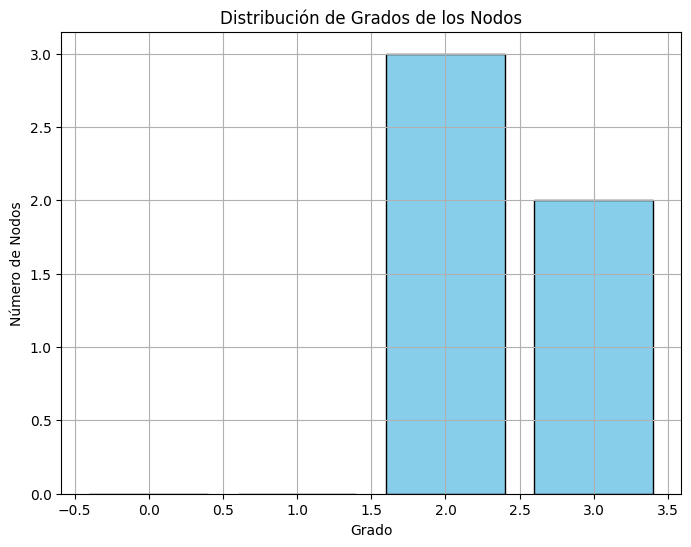

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Crea un grafo de ejemplo
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 1)])

# Calcula la distribución de grados como un histograma
degree_distribution = nx.degree_histogram(G)

# Grafica el histograma
plt.figure(figsize=(8, 6))
plt.bar(range(len(degree_distribution)), degree_distribution, color='skyblue', edgecolor='black')
plt.title("Distribución de Grados de los Nodos")
plt.xlabel("Grado")
plt.ylabel("Número de Nodos")
plt.grid(True)
plt.show()


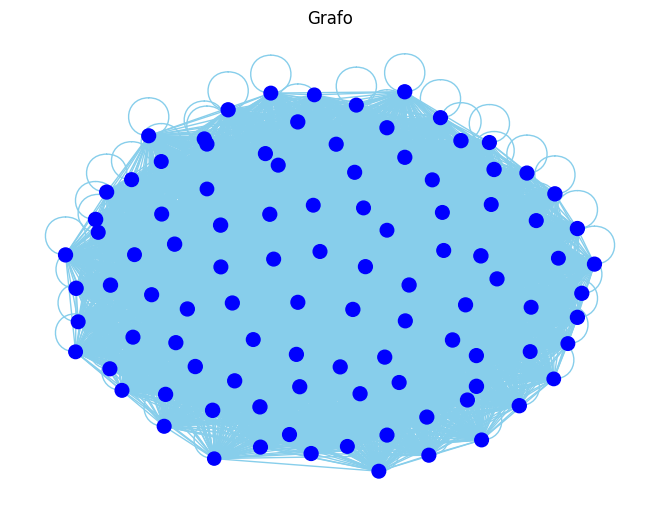

In [13]:
G, tiempo, k0 = preferential(100, 2)
#d = nx.degree_histogram(G)

# Dibujamos el grafo
pos = nx.spring_layout(G)
node_degrees = dict(G.degree())
node_size = [(node_degrees[node] + 1) for node in G.nodes()]
nx.draw(G, pos, with_labels = False, node_size = node_size, node_color = 'blue', font_size = 1, font_weight = 'bold', edge_color = 'skyblue')
plt.title('Grafo')
plt.show()
#print(d)

In [14]:
G = nx.Graph()
m0 = 9
G.add_nodes_from([i for i in range(m0)])
# Unimos algún nodo de forma aleatoria con el 0 (para que despues no dividamos entre 0)
G.add_edge(0, random.randint(0, m0))
list(dict(G.degree()).values())[0]
dict(G.degree())

{0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}

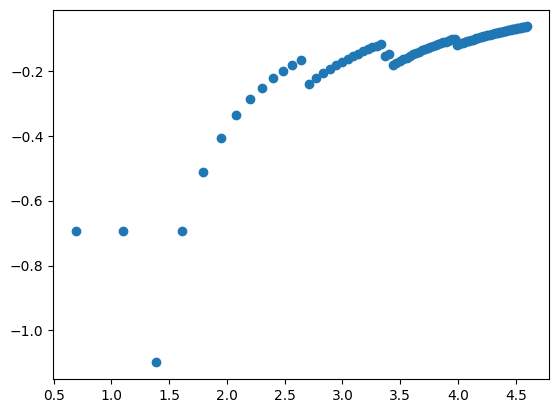

In [15]:
plt.plot(np.log(tiempo[1:]), np.log(k0[:len(tiempo)-1]), 'o')

In [16]:
regresion_grados(G)

2


C:\Users\Juanjo\AppData\Local\Temp\ipykernel_18612\1167694303.py:56: RuntimeWarning: divide by zero encountered in log
  ajuste = np.polyfit(np.log(x_r[::-1]), np.log(y_r[:]), deg = 1)


LinAlgError: SVD did not converge in Linear Least Squares

In [17]:
# Calcula la distribución de grados como un histograma
degree_distribution = nx.degree_histogram(G)
count(degree_distribution)

# Grafica el histograma
plt.figure(figsize=(8, 6))
plt.bar(range(len(degree_distribution), 0), degree_distribution, color='skyblue', edgecolor='black')
plt.title("Distribución de Grados de los Nodos")
plt.xlabel("Grado")
plt.ylabel("Número de Nodos")
plt.grid(True)
plt.show()

NameError: name 'count' is not defined

(0.0, 10.0)

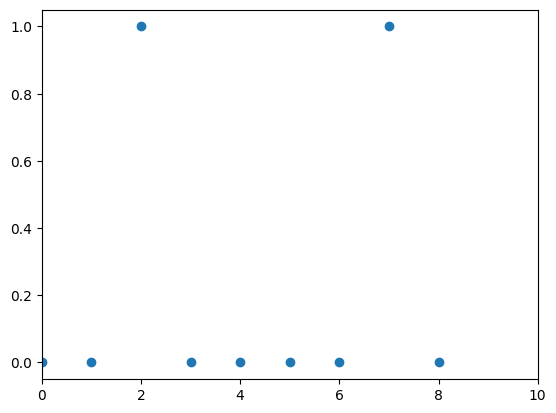

In [12]:
cuentas = [nx.degree_histogram(G).count(elemento) for elemento in range(len(G.nodes()))]
plt.plot(cuentas, 'o')
plt.xlim(0, 10)

In [62]:
grados = nx.degree_histogram(G)
grados[]

121

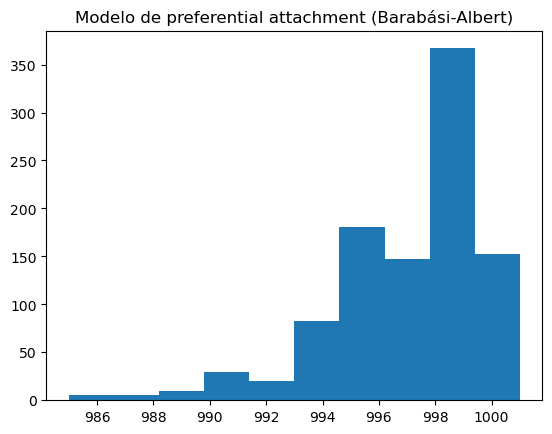

In [65]:
plt.hist([tup[1] for tup in G.degree])
plt.title("Modelo de preferential attachment (Barabási-Albert)")
plt.show()

In [64]:
G.degree()

DegreeView({0: 986, 1: 990, 2: 985, 3: 991, 4: 992, 5: 993, 6: 992, 7: 985, 8: 988, 9: 985, 10: 991, 11: 996, 12: 989, 13: 995, 14: 990, 15: 992, 16: 989, 17: 993, 18: 987, 19: 995, 20: 995, 21: 993, 22: 994, 23: 987, 24: 991, 25: 993, 26: 993, 27: 987, 28: 994, 29: 992, 30: 992, 31: 993, 32: 991, 33: 994, 34: 996, 35: 992, 36: 990, 37: 996, 38: 991, 39: 990, 40: 988, 41: 992, 42: 995, 43: 993, 44: 993, 45: 992, 46: 994, 47: 994, 48: 994, 49: 1001, 50: 991, 51: 997, 52: 996, 53: 989, 54: 989, 55: 989, 56: 995, 57: 995, 58: 990, 59: 997, 60: 994, 61: 995, 62: 994, 63: 993, 64: 989, 65: 999, 66: 993, 67: 996, 68: 989, 69: 991, 70: 997, 71: 997, 72: 994, 73: 993, 74: 997, 75: 996, 76: 993, 77: 994, 78: 995, 79: 992, 80: 999, 81: 996, 82: 991, 83: 997, 84: 989, 85: 992, 86: 995, 87: 995, 88: 996, 89: 990, 90: 996, 91: 997, 92: 993, 93: 996, 94: 996, 95: 993, 96: 991, 97: 990, 98: 994, 99: 996, 100: 992, 101: 998, 102: 985, 103: 995, 104: 998, 105: 990, 106: 994, 107: 998, 108: 991, 109: 98